# Setup

In [129]:
import design_tools_template as dt
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Caso de teste da função aerodynamics

In [53]:
Mach = 0.3
altitude = 10.668000000000001
n_engines_failed = 1
flap_def = 0.3490658503988659
slat_def = 0.0
lg_down = 1
h_ground = 10.668000000000001
W0_guess = 422712.9
aircraft = dt.default_aircraft()
dimensions = dt.geometry(aircraft)
nacelle = {
    'yn': 2.6,
    'zn': 0.0,
    'Ln': 4.3,
    'Dn': 1.5,
    'xn': 23.2
}
fus =  {
    'xcg': 16.4,
    'xnp': 16.9,
    'Lf': 32.8,
    'Df': 3.3
}
dimensions['nacelle'] = nacelle
dimensions['fus'] = fus
aircraft['dimensions'] = dimensions


aero, CLmax = dt.aerodynamics(aircraft, Mach, altitude, n_engines_failed, flap_def, 
                                slat_def, lg_down, h_ground, W0_guess)

print(f"aero = {json.dumps(aero, indent = 4)}")
print(f"CL_max = {CLmax}")

aero = {
    "CD0": 0.07528241667668555,
    "K": 0.04101373267784699,
    "Swet_f": 295.7081245265254,
    "Swet_w": 156.30901831103114,
    "Swet_h": 37.303209109730844,
    "Swet_n": 40.52654523130833,
    "Swet_v": 30.667999999999996
}
CL_max = 2.544750781316997


# Questão 1

In [54]:
aircraft = dt.default_aircraft()
aircraft['geo_param']['wing']['sweep'] = 20*np.pi/180
dimensions = dt.geometry(aircraft)
dimensions['nacelle'] = nacelle
dimensions['fus'] = fus
aircraft['dimensions'] = dimensions
aero, CLmax = dt.aerodynamics(aircraft, 0.3, 11000, 0, 0.0, 0.0, 0, 0, 422712.9)

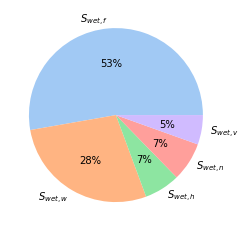

In [87]:
data = list(aero.values())[2:]
labels = ['$S_{wet,f}$', '$S_{wet,w}$', '$S_{wet,h}$', '$S_{wet,n}$', '$S_{wet,v}$']
colors = sns.color_palette('pastel')[0:5]
plt.figure()
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.savefig("fig1.png", dpi=200)
plt.show()

# Questão 2

In [59]:
vec_M = np.linspace(0.6, 0.9, 100)
sweeps = np.arange(start=20, stop=45, step=5) * np.pi/180
vec_CD0 = np.zeros((sweeps.shape[0], vec_M.shape[0]))
for i in range(sweeps.shape[0]):
    for j in range(vec_M.shape[0]):
        aircraft = dt.default_aircraft()
        aircraft['geo_param']['wing']['sweep'] = sweeps[i]
        aircraft['dimensions'] = dimensions
        aero, _ = dt.aerodynamics(aircraft, vec_M[j], 11000, 0, 0.0, 0.0, 0, 0, 422712.9)
        vec_CD0[i, j] = aero["CD0"]

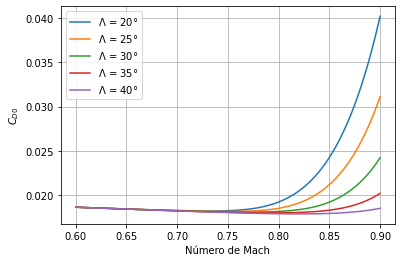

In [88]:
plt.figure()
plt.grid(True)
sweeps = np.arange(start=20, stop=45, step=5)
for i in range(sweeps.shape[0]):
    plt.plot(vec_M, vec_CD0[i, :], label=r"$\Lambda$ = {}°".format(sweeps[i]))

plt.xlabel("Número de Mach")
plt.ylabel("$C_{D0}$")
plt.legend()
plt.savefig("fig2.png", dpi=200)
plt.show()

# Questão 3

In [89]:
sweeps = np.arange(start=20, stop=45, step=5) * np.pi/180
vec_CLmax = np.zeros(sweeps.shape[0])
for i in range(sweeps.shape[0]):
    aircraft = dt.default_aircraft()
    aircraft['geo_param']['wing']['sweep'] = sweeps[i]
    aircraft['dimensions'] = dimensions
    _ , vec_CLmax[i] = dt.aerodynamics(aircraft, 0.8, 11000, 0, 0.0, 0.0, 0, 0, 422712.9)

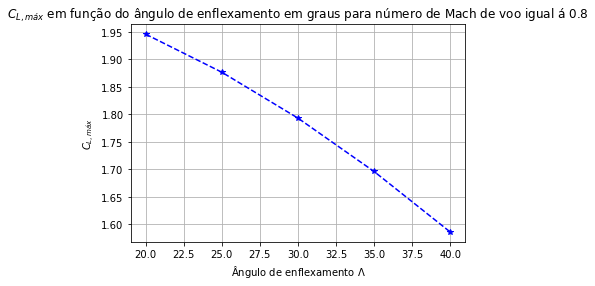

In [96]:
plt.figure()
plt.grid(True)
sweeps = np.arange(start=20, stop=45, step=5)
    
plt.plot(sweeps, vec_CLmax, 'b*--')

plt.xlabel("Ângulo de enflexamento $\Lambda$")
plt.ylabel("$C_{L,máx}$")
plt.savefig("fig3.png", dpi=200)
plt.title("$C_{L,máx}$ em função do ângulo de enflexamento em graus para número de Mach de voo igual á 0.8")
plt.show()

# Questão 4

$\qquad$ Ângulos de enflechamento elevados, como o de 40° possuem pouco arrasto parasita, porém também possuem pouco $C_{L, máx}$, o que é ruim para a aerodinâmica. Em contrapartida, ângulos de enflechamento baixos, como 20° possuem um valor elevado de arrasto parasita e elevado $C_{L, máx}$. Portando, é necessário fazer um $\textit{trade-off}$ para se obter melhores valores dessas duas grandezas. A minha escolha seria ângulo de enflechamento de 30°, pois possui baixo valor de arrasto parasita para $M=0.8$ e um valor moderado de $C_{L, máx}$.

# Questão 5

In [108]:
W0_guess = 422712.9
aircraft = dt.default_aircraft()
dimensions = dt.geometry(aircraft)
dimensions['nacelle'] = nacelle
dimensions['fus'] = fus
aircraft['dimensions'] = dimensions

params = {
    "CD0": [],
    "K": [],
    "CLmax": [],
    "CLmin": -0.5
}

## Cruzeiro

In [109]:
Mach = 0.75
altitude = 11000
n_engines_failed = 0
flap_def = 0.0
slat_def = 0.0
lg_down = 0
h_ground = 0

aero, CLmax = dt.aerodynamics(aircraft, Mach, altitude, n_engines_failed, flap_def, 
                                slat_def, lg_down, h_ground, W0_guess)

params["CD0"].append(aero["CD0"]) 
params["K"].append(aero["K"]) 
params["CLmax"].append(CLmax) 


## Decolagem

In [110]:
Mach = 0.2
altitude = 0
n_engines_failed = 0
flap_def = 20*np.pi/180
slat_def = 0.0
lg_down = 1
h_ground = 10.67

aero, CLmax = dt.aerodynamics(aircraft, Mach, altitude, n_engines_failed, flap_def, 
                                slat_def, lg_down, h_ground, W0_guess)

params["CD0"].append(aero["CD0"]) 
params["K"].append(aero["K"]) 
params["CLmax"].append(CLmax) 

## Pouso

In [111]:
Mach = 0.2
altitude = 0
n_engines_failed = 0
flap_def = 40*np.pi/180
slat_def = 0.0
lg_down = 1
h_ground = 10.67

aero, CLmax = dt.aerodynamics(aircraft, Mach, altitude, n_engines_failed, flap_def, 
                                slat_def, lg_down, h_ground, W0_guess)

params["CD0"].append(aero["CD0"]) 
params["K"].append(aero["K"]) 
params["CLmax"].append(CLmax) 

## Gráfico de polar de arrasto

In [125]:
vec_CD = np.zeros((3, vec_CL.shape[0]))
for i in range(3):
    vec_CL = np.linspace(params["CLmin"], params["CLmax"][i], 100)
    for j in range(vec_CL.shape[0]):
        vec_CD[i, j] = params["CD0"][i] + params["K"][i] * vec_CL[j]**2

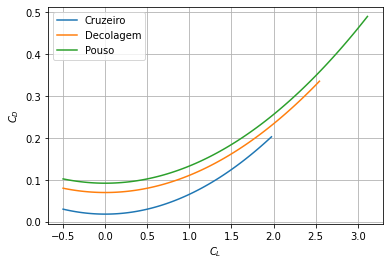

In [128]:
plt.figure()
plt.grid(True)
label = ["Cruzeiro", "Decolagem", "Pouso"]
for i in range(3):
    vec_CL = np.linspace(params["CLmin"], params["CLmax"][i], 100)
    plt.plot(vec_CL, vec_CD[i, :], label=label[i])

plt.xlabel("$C_L$")
plt.ylabel("$C_{D}$")
plt.legend()
plt.savefig("fig4.png", dpi=200)
plt.show()